# Data analytics using SQL and Python

## Objective

My primary goal of this project is to discover insightful information in this database to help the business analyse sales, customers and sales agent performance. Utimately, the business would be able to determine what customer segments they should be targeting in order to boost more sales as well as adjust marketing strategies properly. This analysis would help business address the following questions.

- What city had the highest total sales?
- What type of music people were least interested in purchasing? 
- Did business make a profit in the past years?
- Who were the big spenders, and were they the majority of customers?
- Who were repeat customers?
- What products were most often sold together?
- How many customers were likely to churn the store?
- Who is the most productive sales agent?

In this project, I used Python Pandas & Python Matplotlib to analyze sales and customers.

In [2]:
import pandas as pd
import numpy as np 
import sqlite3
import matplotlib.pyplot as plt

## Database

The dataset can be downloaded from https://www.sqlitetutorial.net/sqlite-sample-database/. The dataset stores a digital media including tables for albums, artists, invoices, customers, employees, genre and tracks. The store purchases are also broken down by month, product type, cost, purchase address, etc. 

In [5]:
conn = sqlite3.connect("/Users/panunyakhemcharoen/Downloads/chinook.db")

## Data Model
To illustrates the chinook database tables and their relationships (source: https://towardsdatascience.com/sql-subqueries-85770fd52eb1)

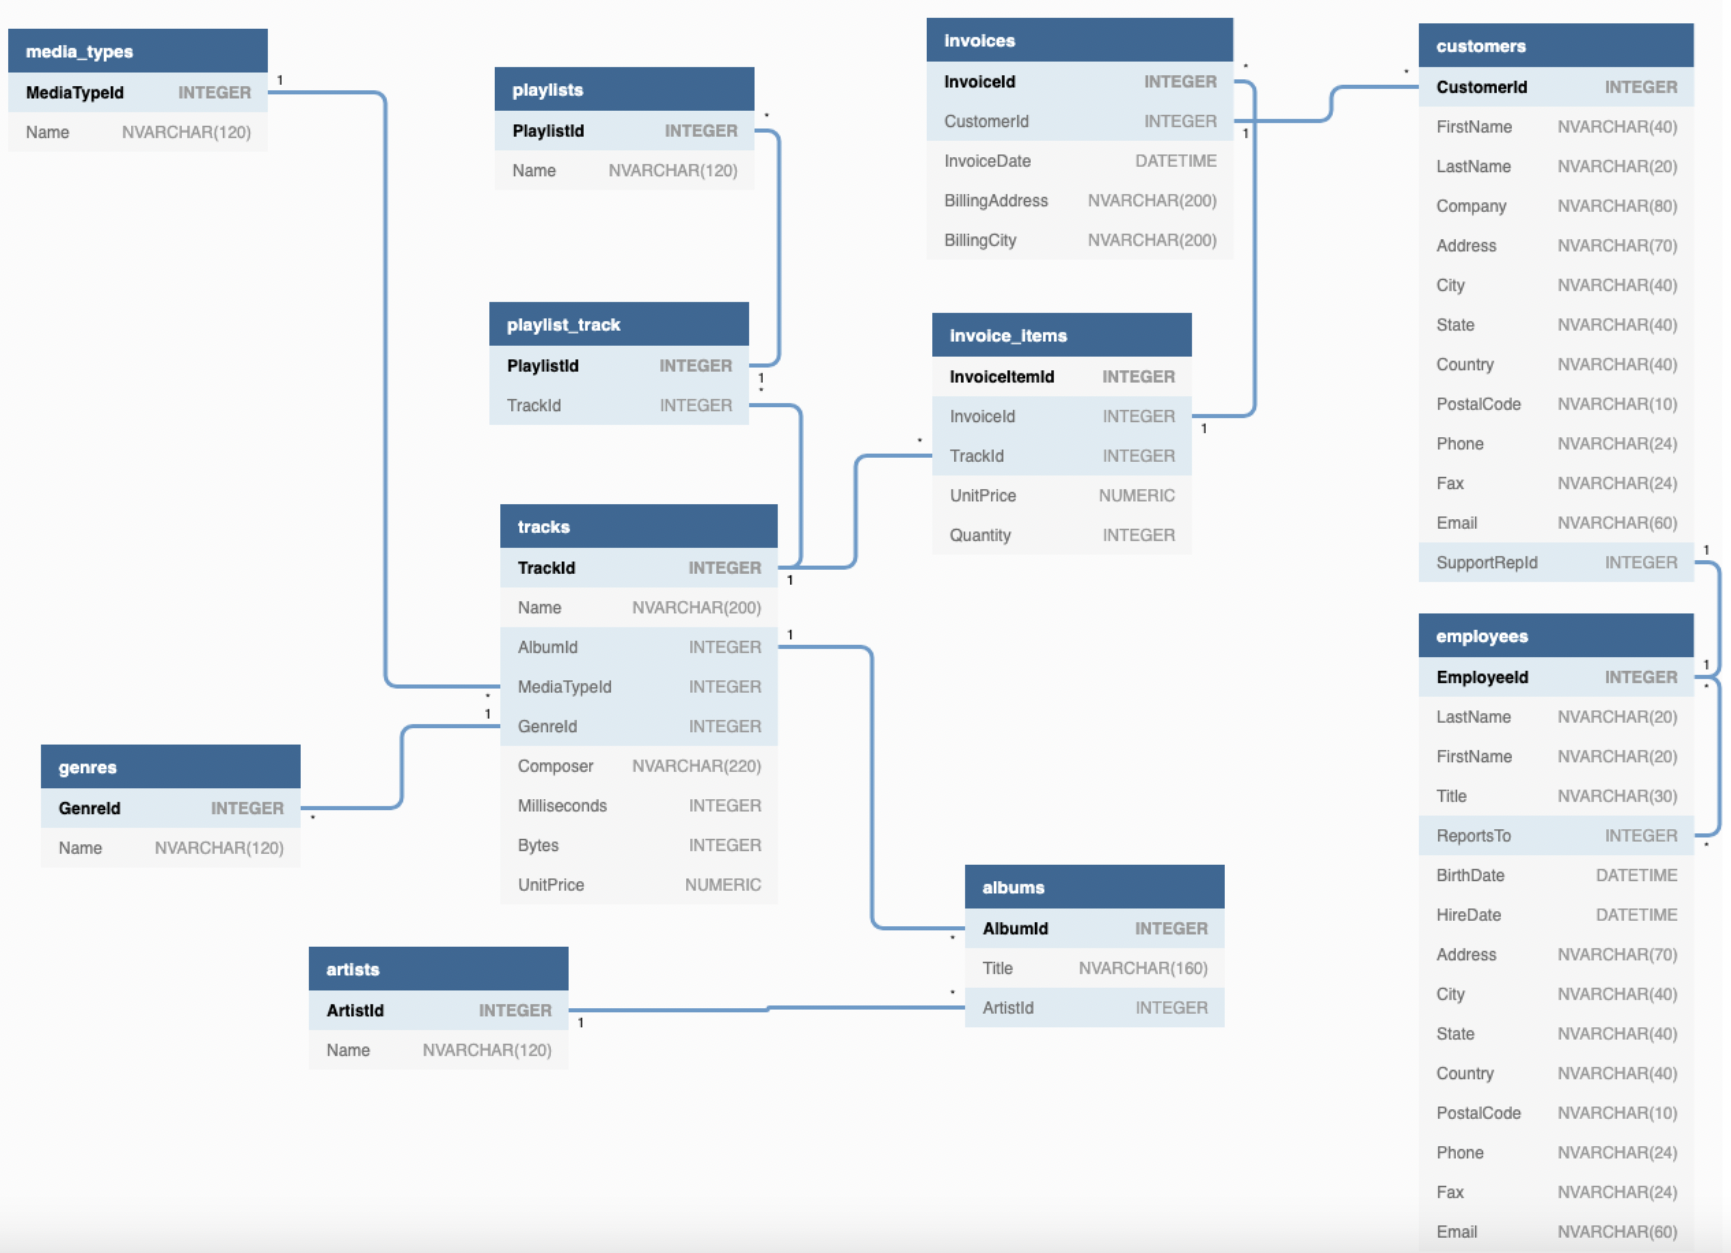

In [4]:
tables = pd.read_sql("""SELECT *
                        FROM  sqlite_master
                        WHERE type='table'""", conn)

In [5]:
tables

,type,name,tbl_name,rootpage,sql
0,table,albums,albums,2,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,artists,artists,4,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,customers,customers,5,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,employees,employees,8,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,genres,genres,10,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,invoices,invoices,11,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,invoice_items,invoice_items,13,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,media_types,media_types,15,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,playlists,playlists,16,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


## Data Cleaning

Duplicate and null records might be created through human error, a bug in your application, or uncleaned data from external sources. As a result, these values could potentially lead to miscalculation. Therefore, I firstly checked whether this database contained such values in order that I could handle them properly. 

### Duplicate Records

The first query allows to identify possible customers presenting more than once in the data table customers. I used customers’ id and their email, as they are supposed to be unique to each customer. I further checked whether there were duplicate invoice transactions using invoices' id since they should be created uniquely.

In [189]:
dups_customer = pd.read_sql("""
                            SELECT customerid, email, COUNT(*)
                            FROM customers
                            GROUP BY 1,2
                            HAVING COUNT(*) > 1                            
                            """, conn)
dups_customer

,CustomerId,Email,COUNT(*)


In [195]:
dups_invoices = pd.read_sql("""
                            SELECT invoiceid, COUNT(*)
                            FROM invoices
                            GROUP BY 1
                            HAVING COUNT(*) > 1                            
                            """, conn)
dups_invoices

,InvoiceId,COUNT(*)


It appears no duplicates were found in tables since both tables returned empty.

### Missing Value

In [215]:
invoices = pd.read_sql("""
                        SELECT *
                        FROM customers
                        """, conn)
nan_cus = customers.isnull().sum()
nan_cus

CustomerId       0
FirstName        0
LastName         0
Company         49
Address          0
City             0
State           29
Country          0
PostalCode       4
Phone            1
Fax             47
Email            0
SupportRepId     0
dtype: int64

In [214]:
invoices = pd.read_sql("""
                        SELECT *
                        FROM invoices
                        """, conn)
nan_inv = invoices.isnull().sum()
nan_inv 

InvoiceId              0
CustomerId             0
InvoiceDate            0
BillingAddress         0
BillingCity            0
BillingState         202
BillingCountry         0
BillingPostalCode     28
Total                  0
dtype: int64

In [213]:
inv_items = pd.read_sql("""
                        SELECT *
                        FROM invoice_items
                        """, conn)
nan_inv_items = inv_items.isnull().sum()
nan_inv_items

InvoiceLineId    0
InvoiceId        0
TrackId          0
UnitPrice        0
Quantity         0
dtype: int64

## Sales Analysis

Knowing the total sales from each cities would help the business to understand the business as a whole and be able 
to narrow it down to specific countries so that the business could plan for marketing accordingly. To address the first objective, I summarized the total amount of sales per city, then sorted by descending order.

In [6]:
cities_most_invoice = pd.read_sql("""
                             SELECT billingcity,billingcountry,SUM(total) AS Total
                             FROM invoices
                             GROUP by 1,2  
                             ORDER by 3 desc                                                     
                                  """, conn)
cities_most_invoice

,BillingCity,BillingCountry,Total
0,Prague,Czech Republic,90.24
1,Paris,France,77.24
2,Mountain View,USA,77.24
3,Berlin,Germany,75.24
4,London,United Kingdom,75.24
5,São Paulo,Brazil,75.24
6,Fort Worth,USA,47.62
7,Santiago,Chile,46.62
8,Budapest,Hungary,45.62
9,Dublin,Ireland,45.62


As can be seen that Prague had the higest total sales, followed by Paris and Mountain View. It surprises us that Prague ranked number one insted of cities in USA which is more likely to be the center of the music industry and homes to many of the biggest artists in the world. I further created a visualization to see which countries had the highest total sales.  

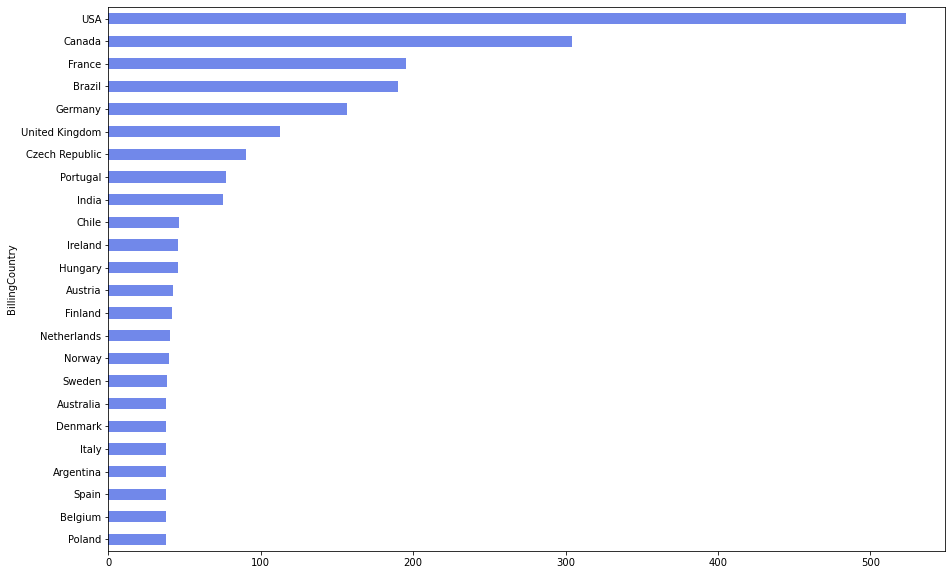

In [285]:
#country_group = invoices.groupby('BillingCountry').sum().nlargest(5, 'Total').sort_values('Total')
country_group = invoices.groupby('BillingCountry').sum().sort_values('Total')
country_group['Total'].plot.barh(figsize=(15,10),color="#7188ea");

USA was ranked number one as expected considering by the total sales per country. It is interesting that Canada had the second highest sales, while its city was not listed in the top ten rank. Apart from focusing marketing strategies for the least profitable cities, the business could do more marketing in USA and Canada due to a large number of population.

Next, it is important to know what type of musics people were least interested in purchasing so that we could throw a promotion. To approach this question, I summarized the number of invoices per genre, then sorted by ascending order to present only top five the lowest total sales.

In [294]:
least_sales = pd.read_sql("""
                             SELECT g.name, count(t.trackid) as Total_Invoices
                             FROM genres g
                             JOIN tracks t
                             ON g.genreid = t.genreid
                             JOIN invoice_items ii
                             ON t.trackid = ii.trackid
                             JOIN invoices i
                             ON i.invoiceid = ii.invoiceid
                             GROUP BY 1
                             ORDER BY 2 
                                                                                                             
                          """, conn)
least_sales

,Name,Total_Invoices
0,Rock And Roll,6
1,Science Fiction,6
2,Comedy,9
3,Easy Listening,10
4,Electronica/Dance,12
5,Heavy Metal,12
6,World,13
7,Alternative,14
8,Bossa Nova,15
9,Hip Hop/Rap,17


We can see that Rock and Roll and Science Fiction types of songs had the lowest number of invoices. So, the store should offer an attractive sales promotion for these catagories to gain more customers.

Next, the business should know which alblums did not sell well so they could promote them to get more attention from customers.

In [128]:
invoice_items    = pd.read_sql("""                                                  
                             SELECT al.Title, a.Name, SUM(ii.quantity*ii.unitprice) 
                             FROM invoice_items ii        
                             JOIN tracks t
                             ON t.trackid = ii.trackid 
                             JOIN albums al
                             ON al.albumid = t.albumid
                             JOIN artists a
                             ON a.artistid = al.artistid
                             GROUP BY 1,2
                             ORDER BY 3                                                      
                              """, conn)
invoice_items  

,Title,Name,SUM(ii.quantity*ii.unitprice)
0,"Adams, John: The Chairman Dances",Edo de Waart & San Francisco Symphony,0.99
1,Bach: The Brandenburg Concertos,Orchestra of The Age of Enlightenment,0.99
2,Bach: The Cello Suites,Yo-Yo Ma,0.99
3,Bark at the Moon (Remastered),Ozzy Osbourne,0.99
4,Bartok: Violin & Viola Concertos,Yehudi Menuhin,0.99
...,...,...,...
299,"Heroes, Season 1",Heroes,25.87
300,"Lost, Season 2",Lost,25.87
301,Minha Historia,Chico Buarque,26.73
302,"The Office, Season 3",The Office,31.84


As can be seen some albums did not sell well. 39 albums had the lowest total sales.

In [133]:
invoice_items_lowest = invoice_items[invoice_items['SUM(ii.quantity*ii.unitprice)'] == 0.99]
invoice_items_lowest

,Title,Name,SUM(ii.quantity*ii.unitprice)
0,"Adams, John: The Chairman Dances",Edo de Waart & San Francisco Symphony,0.99
1,Bach: The Brandenburg Concertos,Orchestra of The Age of Enlightenment,0.99
2,Bach: The Cello Suites,Yo-Yo Ma,0.99
3,Bark at the Moon (Remastered),Ozzy Osbourne,0.99
4,Bartok: Violin & Viola Concertos,Yehudi Menuhin,0.99
5,Beethoven Piano Sonatas: Moonlight & Pastorale,Maurizio Pollini,0.99
6,Beethoven: Symphony No. 6 'Pastoral' Etc.,Otto Klemperer & Philharmonia Orchestra,0.99
7,Blizzard of Ozz,Ozzy Osbourne,0.99
8,Carried to Dust (Bonus Track Version),Calexico,0.99
9,Chopin: Piano Concertos Nos. 1 & 2,"Emanuel Ax, Eugene Ormandy & Philadelphia Orch...",0.99


Next, I created a visulization representing sales trend in order to help business see clearly whether the store was making profit or loss. First, I examined the invoice table.

In [11]:
invoices = pd.read_sql("""SELECT *
                        FROM invoices
                        """, conn)
invoices

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


I chose to present year-over-year total in order to simplify my visualization, and we can see how total had changed in overall. Therefore, I created a new variable "Year" containning only year of invoice. 

In [12]:
invoices['InvoiceDate'] = pd.to_datetime(invoices['InvoiceDate']) 
invoices['Year'] = invoices['InvoiceDate'].dt.year
# Notice we have to change data type from integer to object to avoid decimal year
invoices['Year'] = invoices['Year'].astype(str)
invoices

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,Year
0,1,2,2009-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98,2009
1,2,4,2009-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96,2009
2,3,8,2009-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94,2009
3,4,14,2009-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91,2009
4,5,23,2009-01-11,69 Salem Street,Boston,MA,USA,2113,13.86,2009
...,...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05,319 N. Frances Street,Madison,WI,USA,53703,3.96,2013
408,409,29,2013-12-06,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94,2013
409,410,35,2013-12-09,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91,2013
410,411,44,2013-12-14,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86,2013


In [13]:
invoices_group = invoices.groupby('Year').sum()
invoices_group

,InvoiceId,CustomerId,Total
Year,,,
2009,3486,2446,449.46
2010,10375,2551,481.45
2011,17264,2492,469.58
2012,24153,2369,477.53
2013,29800,2473,450.58


In [16]:
import seaborn as sns

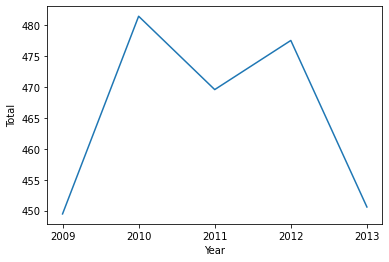

In [14]:
ax = sns.lineplot(x="Year",y="Total",data=invoices_group)

I summarized total sales per year, and ploted graph. We can see inconsistent sales trend. The total sales dropped significantly in 2013. It is possible that declines in digital music sales has been partly attributed to the move to streaming, especially the free, ad supported versions that most music streaming services are providing.

Since genre popularity has changed over time, it is important for the store to know the latest trend in order not to lose customers. Therefore, I created a visualization to demonstate sales trend by month and across all genres.

In [15]:
popular_genres = pd.read_sql("""
                             SELECT g.name, DATE(i.invoicedate) AS Date
                             FROM genres g
                             JOIN tracks t
                             ON g.genreid = t.genreid
                             JOIN invoice_items ii
                             ON t.trackid = ii.trackid
                             JOIN invoices i
                             ON i.invoiceid = ii.invoiceid   
                             ORDER BY 1
                         
                          """, conn)
popular_genres

,Name,Date
0,Alternative,2010-03-21
1,Alternative,2010-03-21
2,Alternative,2010-03-21
3,Alternative,2010-03-21
4,Alternative,2010-03-21
...,...,...
2235,World,2012-02-01
2236,World,2012-04-03
2237,World,2013-05-11
2238,World,2013-07-12


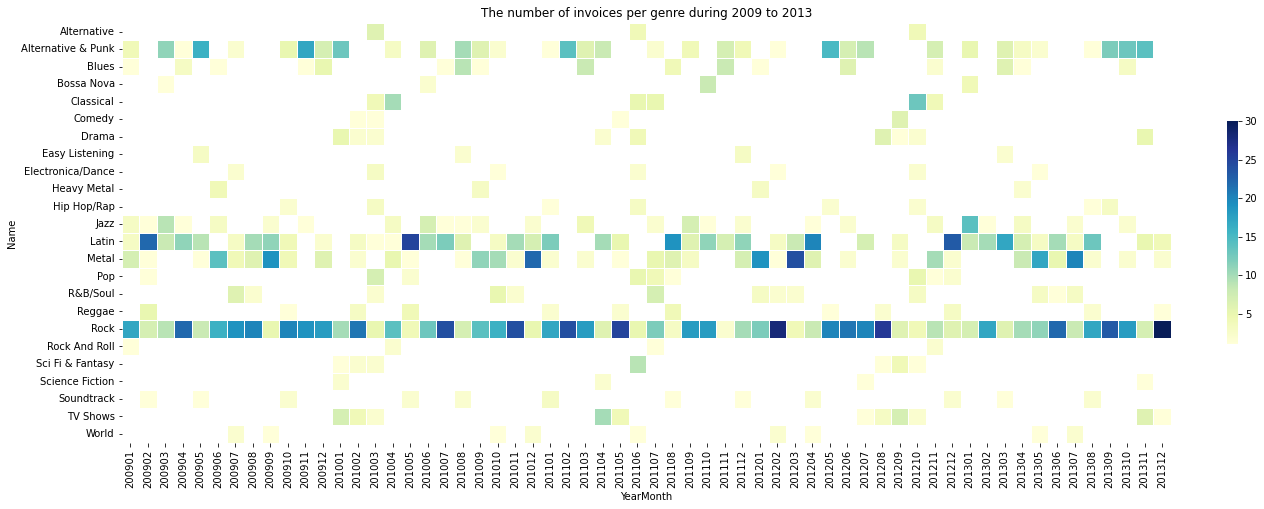

In [18]:
popular_genres['Date'] =pd.to_datetime(popular_genres['Date']) 
popular_genres['YearMonth'] = popular_genres['Date'].map(lambda x:100*x.year + x.month)
df_heatmap = (popular_genres.groupby('Name').filter(lambda x : len(x) > 1).groupby(['Name','YearMonth']).size().unstack())

plt.figure(figsize=(20,20))
g = sns.heatmap(
    df_heatmap, 
    square=True, 
    cbar_kws={'fraction' : 0.01},
    cmap='YlGnBu',
    linewidth=1
)

var=g.set_title('The number of invoices per genre during 2009 to 2013')

Although the store had experienced sales inconsistent, Rock had remarkably stable sales performance. Unsurprisingly, according to the research, due to their creativity and uniqueness, rock appears to be the most popular genre in many regions, particularly in the States and in Europe. We also see the similar pattern across Latin, Metal, and Alternative genre. Their sales were fairly consistent throughout the years. It is likely that the majority of customers were in States, South America and Europe where rock and latin were popular. As a result, their sales were consistent unlike the other genres.

# Customers analysis


It is useful to categorize customers according to their spending in order that the company could see which customer group should be more targeted. Due to this reason, I created customer groups: High, Medium and Low spender. 
- High spender is a customer spent greater than or equal to 20 dollars 
- Medium spender is a customer spent greater than or equal to 10 dollars
- Low spender is a customer spent less than 10 dollars

In [200]:
spenders = pd.read_sql("""SELECT 
                            invoiceid,
                            total,
                            CASE
                                WHEN total >=20 THEN 'High spender'
                                WHEN total >=10 THEN 'Medium spender'
                                ELSE 'Low spender'
                            END AS Category
                          FROM invoices
                          ORDER BY total DESC                        
                       """, conn)

spenders

,InvoiceId,Total,Category
0,404,25.86,High spender
1,299,23.86,High spender
2,96,21.86,High spender
3,194,21.86,High spender
4,89,18.86,Medium spender
...,...,...,...
407,377,0.99,Low spender
408,384,0.99,Low spender
409,391,0.99,Low spender
410,398,0.99,Low spender


In [387]:
spenders_group = spenders.groupby('Category').sum()
spenders_group

,InvoiceId,Total
Category,,
High spender,993,93.44
Low spender,71604,1386.28
Medium spender,12481,848.88


The majority of sales came from low spenders. The business should consider launching a compagine to appeal high spenders, becuase they are valuable. It would make the business more profitable to have more loyal high spenders who keep purchasing regularly.

It is important to know customers spent more money so that the company could make them a priority by offereing them special services. It is widely known that retaining existing customers is much less expensive than acquiring new ones, and holding onto biggest spenders is even more crucial.

In [397]:
max_customer = pd.read_sql("""
                             SELECT C.customerid, SUM(I.total)                            
                             FROM customers C
                             JOIN invoices I
                             ON C.customerid = I.customerid
                             GROUP BY 1
                             ORDER BY 2 DESC
                             LIMIT 10                            
                          """, conn)
max_customer

,CustomerId,SUM(I.total)
0,6,49.62
1,26,47.62
2,57,46.62
3,45,45.62
4,46,45.62
5,28,43.62
6,24,43.62
7,37,43.62
8,7,42.62
9,25,42.62


CustomerID 6,26 and 57 spent most. 

Knowing what big spenders are spending on is a good idea to drive more revenue. It makes sense that marketing for top customers should be different from average customers. For example, the business could implement personalized marketing strategies to keep top spenders coming back.

In [430]:
customers = pd.read_sql("""
                        SELECT c.customerid, i.invoiceid, g.name, i.total
                        FROM invoices i
                        JOIN customers c
                        ON c.customerid = i.customerid 
                        JOIN invoice_items ii
                        ON ii.invoiceid = i.invoiceid 
                        JOIN tracks T
                        ON t.trackid = II.trackid
                        JOIN genres G
                        ON g.genreId = T.genreId
                        WHERE c.customerid = 6
                        GROUP BY 2
""", conn) 
customers


,CustomerId,InvoiceId,Name,Total
0,6,46,Rock,8.91
1,6,175,Rock,1.98
2,6,198,Rock,3.96
3,6,220,Blues,5.94
4,6,272,Latin,0.99
5,6,393,Alternative & Punk,1.98
6,6,404,Alternative & Punk,25.86


Our biggest spender appeared to be Rock and Punk lover. It is interesting to note that he or she spent most in Punk.

Repeat customers are vital for every business. They are not only easily to sell to, but they are also likely to spend higher at store more often. As each time a customer makes a purchase, they are becoming more comfortable with the store. Due to this reason, I extracted customers buying more one time in the last year. 

In [38]:
repeat_cus = pd.read_sql("""
                             SELECT customerid, COUNT(customerid) Times
                             FROM invoices 
                             WHERE invoicedate >= '2013-01-01'  
                             GROUP BY customerid   
                             HAVING COUNT (customerid) > 1                                                     
                          """, conn)
repeat_cus  

,CustomerId,Times
0,3,2
1,6,2
2,8,2
3,10,2
4,12,3
5,14,2
6,16,2
7,18,2
8,20,2
9,25,2


26 customers purchased more than once in the last year. 

As mentioned previously, acquiring new customers could be several times more expensive than selling to existing ones. It is crucial to know whether customers are churning to help the store create appropriate marketing strategies and retain customers. Firstly, I defined a churned customer as one who did not place an order in more than 60 days since 22 December 2013, which is the last invoice date being recorded in this database.

In [110]:
invoices['InvoiceDate'] = pd.to_datetime(invoices['InvoiceDate']) 
invoices['EndDate'] = pd.to_datetime('2013-12-22', format='%Y-%m-%d')
invoices['TotalDays'] = invoices['EndDate'] - invoices['InvoiceDate']
invoices = invoices.sort_values(by='TotalDays', ascending=True).drop_duplicates(['CustomerId'])
invoices['TotalDays'] = invoices['TotalDays'].dt.days.astype('int16')
invoices[invoices['TotalDays'] > 180]

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,EndDate,Diff,TotalDays
369,370,7,2013-06-19,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,0.99,2013-12-22,186,186
368,369,52,2013-06-11,202 Hoxton Street,London,None,United Kingdom,N1 5LH,13.86,2013-12-22,194,194
367,368,43,2013-06-06,"68, Rue Jouvence",Dijon,None,France,21000,8.91,2013-12-22,199,199
366,367,37,2013-06-03,Berger Straße 10,Frankfurt,None,Germany,60316,5.94,2013-12-22,202,202
362,363,28,2013-05-19,302 S 700 E,Salt Lake City,UT,USA,84102,0.99,2013-12-22,217,217
361,362,14,2013-05-11,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,13.86,2013-12-22,225,225
360,361,5,2013-05-06,Klanova 9/506,Prague,None,Czech Republic,14700,8.91,2013-12-22,230,230
355,356,49,2013-04-18,Ordynacka 10,Warsaw,None,Poland,00-358,0.99,2013-12-22,248,248
353,354,26,2013-04-05,2211 W Berry Street,Fort Worth,TX,USA,76110,8.91,2013-12-22,261,261
348,349,11,2013-03-18,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,0.99,2013-12-22,279,279


The queries below is to check whether the above output is correct. The last purchase of CustomerId 59 was on 30 May 2012, or 571 days ago as presented in the output.

In [91]:
churned_ck  = pd.read_sql("""SELECT *
                        FROM invoices
                        WHERE customerId = 59
                        """, conn)
churned_ck 

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,23,59,2009-04-05 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,3.96
1,45,59,2009-07-08 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,5.94
2,97,59,2010-02-26 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,1.99
3,218,59,2011-08-20 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,1.98
4,229,59,2011-09-30 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,13.86
5,284,59,2012-05-30 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,8.91


To sum up, 28 customers appeared stop purchasing after 22 December 2013 more than 180 days. It is a concern that big spender CustomerID 26 and 57 were also leaving the store.

To stay ahead of the competition, store needs to understand customer behaviors, like what items their customers frequently bought together. Understanding customers’ favorite item combinations helps business increase customer average order value through cross-sells, upsells and bundled promotional offers. The queries below is finding what items has been bought together as well as making sure it returns results correctly. 

In [72]:
items_bought_together    = pd.read_sql("""
                             SELECT t1.trackid as item_1, t2.trackid as item_2, COUNT(*) AS times_bought_together
                             FROM invoice_items t1
                             JOIN invoice_items t2
                             ON t1.invoiceid = t2.invoiceid
                             WHERE t1.trackid > t2.trackid
                             GROUP BY t1.trackid, t2.trackid
                             ORDER BY times_bought_together DESC                                                                               
                                      """, conn)
items_bought_together 

,item_1,item_2,times_bought_together
0,32,20,2
1,66,48,2
2,84,48,2
3,84,66,2
4,241,229,2
...,...,...,...
8773,3500,3476,1
8774,3500,3482,1
8775,3500,3488,1
8776,3500,3494,1


In [140]:
invoice_items_ck    = pd.read_sql("""
                             SELECT i.InvoiceLineId, i.InvoiceId, i.trackId, 
                                    i.UnitPrice, i.Quantity, t.Name Track_Name, a.name Artist, g.name Genre
                             FROM  invoice_items i
                             JOIN  tracks t
                             ON    i.trackId = t.trackId
                             JOIN  albums al
                             ON    al.albumId = t.albumId 
                             JOIN  artists a
                             ON    a.artistId = al.artistId
                             JOIN  genres g
                             ON    g.genreId = t.genreId
                             WHERE i.trackid = 32 OR i.trackid = 20                                                      
                                  """, conn)
invoice_items_ck 

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,Track_Name,Artist,Genre
0,8,3,20,0.99,1,Overdose,AC/DC,Rock
1,1157,214,20,0.99,1,Overdose,AC/DC,Rock
2,11,3,32,0.99,1,Deuces Are Wild,Aerosmith,Rock
3,1159,214,32,0.99,1,Deuces Are Wild,Aerosmith,Rock


Take the first result as example, customers were likely to buy trackId 32 and trackId 20 together at once. Moreover, we can see that customers bought a pair of them twice times as seen in invoive 3 and 214 respectively.

# Sales agent performance

In order to secure more sales, agents have to be connecting well with customers. The queries below is to find out who were the top performers.

In [182]:
sales_perf   = pd.read_sql("""
                        SELECT e.firstname || " " || e.lastname Agent_Name, 
                               SUM(i.total) Total_Sales, COUNT(c.customerid) Num_Customers
                        FROM employees e
                        JOIN customers c
                        ON e.employeeid = c.supportrepid
                        JOIN invoices i
                        ON i.customerid = c.customerid
                        GROUP BY 1
                        ORDER BY 2 desc
                           """, conn)
sales_perf

,Agent_Name,Total_Sales,Num_Customers
0,Jane Peacock,833.04,146
1,Margaret Park,775.40,140
2,Steve Johnson,720.16,126


Based on the total sales and the number of customers, Jane was the most productive sales agent. It is also possible that there are other factors influencing sales performance. For example, Jane might supervise Matgaret and Steve, so they had to report her, or Jane had been working with the store longest. I further inspected more detail to see whether my assumption is correct.

In [183]:
sales_perf   = pd.read_sql("""
                        SELECT e.firstname || " " || e.lastname Agent_Name, 
                               DATE(e.hiredate) Hire_Date, SUM(i.total) Total_Sales, COUNT(c.customerid) Num_Customers, 
                               ee.firstname || " " || ee.lastname Supervisor
                        FROM employees e
                        JOIN customers c
                        ON e.employeeid = c.supportrepid
                        JOIN invoices i
                        ON i.customerid = c.customerid
                        INNER JOIN employees ee
                        ON e.reportsto = ee.employeeid
                        GROUP BY 1,2
                        ORDER BY 3 desc
                           """, conn)
sales_perf

,Agent_Name,Hire_Date,Total_Sales,Num_Customers,Supervisor
0,Jane Peacock,2002-04-01,833.04,146,Nancy Edwards
1,Margaret Park,2003-05-03,775.40,140,Nancy Edwards
2,Steve Johnson,2003-10-17,720.16,126,Nancy Edwards


We could see more clearly that Jane had been working the longest. Therefore, she would have had more time to aquire customers. Interestingly, Margaret was hired a year after Jane, however Margaret actually had 6 customers more than Jane. I would also assume that Jane's customers were repeat customers, they might prefer purchasing with Jane resulted in her total sales ranked number one.

# Conclusion

- Prague was the most profitable city, whereas Bangalore was the least profitable city. However, considering the country sales, USA and Canada were best-performing.
- Rock and Roll and Science Fiction type of song had the lowest number of invoices that business could offer an  attractive sales promotion for these catagories to gain more customers.
- Of 304 albums, 39 albums had the lowest total sales. The store should ensure these albums were promoted and marketed to target customers.
- Total sales were inconsistent during 2009 to 2013. Interestingly, total sales fell dramatically in the last year.
- Across all genre, rock had remarkably stable sales performance. Latin, Metal, and Alternative sales were also fairly consistent throughout the periods. The store might consider adding more Rock, Latin, Metal, and Alternative tracks to gain more sales. 
- CustomerID 6,26 and 57 purchased most more than 40 dollars. However, the majority of sales came from customers purchased less than 10 dolloars.
- Store should focus exclusively on 26 customers who purchased more than once in the past year. Repeat customers  are not only significantly profitable, but they are likely to purchase more and willing to make a positive         referral to the business. 
- Some items could potentially be sold together such as trackId 32 and trackId 20. The business could have product bundling for these items to encorage customers to buy more products.
- Of 58 customers, 28 customers were likely to churn the store including some of big spenders like CustomerId 26 and 57. They appeared stop purchasing more than 180 days. It is recommended that the store should focus on high risk customers to churn and offer them incentives to stay. 
- Even though Jane Peacock was the top-performing agent, it is interesting to note that Margaret Park who was hired a year after Jane had almost the same number of customers as supposed to Margaret. The store should consider giving her promotion and she could arrage the session to share her experience to other employees. As a result, the store would have the best sales reps team to give a top-notch customer experience.